In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import sys
sys.path.append('/home/tomek/ib_tools')
import matplotlib.pyplot as plt
%matplotlib inline
from tester import get_data, get_candles, get_vol, get_avg_vol

In [3]:
contract = 'NQ'
start_date= '20190101'
end_date = '20191231'
time_int = 30
vol_lookback = 200

In [7]:
data = get_data(contract, start_date, end_date)
# using all data to get candle size -> avg out over the period
candles = get_candles(data, get_avg_vol(data, time_int)).set_index('date')
vols = get_vol(candles, vol_lookback).dropna()

In [8]:
data

,open,high,low,close,volume,average,barCount
date,,,,,,,
2019-01-02 00:00:00,6349.50,6355.75,6344.00,6353.00,332,6348.950,188
2019-01-02 00:01:00,6352.50,6364.75,6351.50,6361.25,296,6359.125,226
2019-01-02 00:02:00,6360.75,6371.50,6359.25,6368.50,339,6366.850,256
2019-01-02 00:03:00,6369.25,6371.75,6366.00,6366.25,195,6368.825,138
2019-01-02 00:04:00,6367.00,6367.50,6364.50,6366.25,154,6366.425,104
...,...,...,...,...,...,...,...
2019-09-04 18:27:00,7695.50,7696.00,7694.75,7695.00,369,7695.475,178
2019-09-04 18:28:00,7695.00,7695.50,7694.75,7695.00,173,7695.025,72
2019-09-04 18:29:00,7695.00,7695.75,7694.50,7695.00,195,7695.125,87


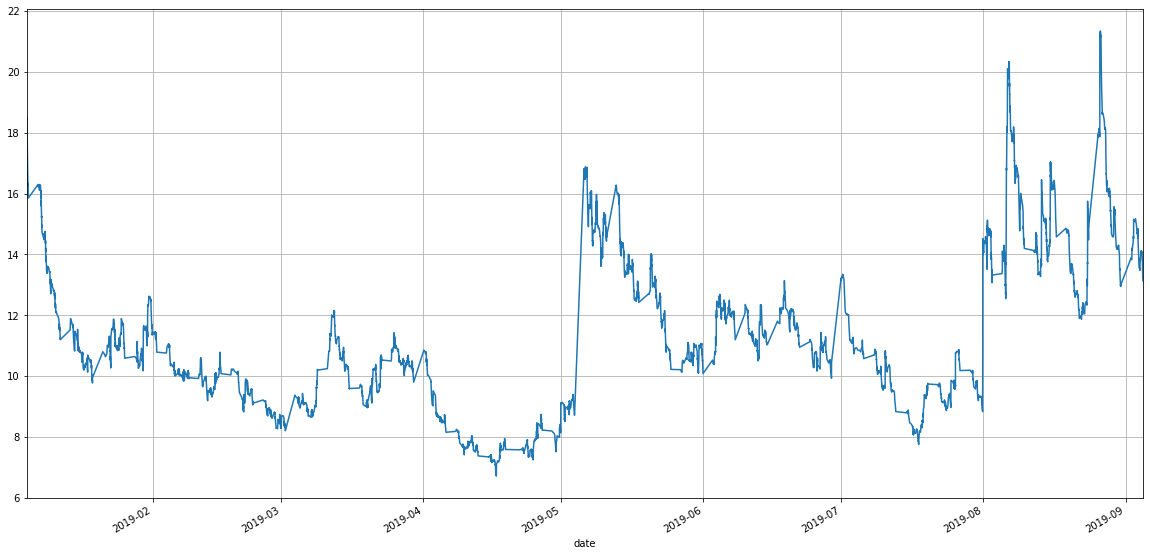

In [15]:
vols.plot(figsize=(20,10), grid=True);

In [20]:
vols.loc['20190501':].iloc[100:].head(50)

date
2019-05-03 03:26:00     8.985568
2019-05-03 06:09:00     9.197642
2019-05-03 10:01:00     9.246034
2019-05-03 12:37:00     9.203014
2019-05-03 14:09:00     9.217541
2019-05-03 14:31:00     9.241253
2019-05-03 14:48:00     9.396318
2019-05-03 15:12:00     9.363662
2019-05-03 15:30:00     9.319826
2019-05-03 15:35:00     9.275487
2019-05-03 15:40:00     9.267673
2019-05-03 15:45:00     9.257746
2019-05-03 15:51:00     9.366422
2019-05-03 15:59:00     9.337848
2019-05-03 16:02:00     9.340044
2019-05-03 16:09:00     9.310643
2019-05-03 16:16:00     9.265671
2019-05-03 16:26:00     9.219247
2019-05-03 16:34:00     9.258025
2019-05-03 16:45:00     9.214913
2019-05-03 16:55:00     9.198640
2019-05-03 17:01:00     9.171298
2019-05-03 17:09:00     9.142317
2019-05-03 17:20:00     9.103356
2019-05-03 17:29:00     9.092330
2019-05-03 17:42:00     9.067463
2019-05-03 17:59:00     9.022926
2019-05-03 18:15:00     8.989467
2019-05-03 18:30:00     8.989871
2019-05-03 18:47:00     8.985189
2019-

In [21]:
candles.loc['2019-05-03 21:59:00':].head(50)

,open,high,low,close,barCount,volume
date,,,,,,
2019-05-03 21:59:00,7859.75,7859.75,7855.75,7857.25,2530,8069
2019-05-03 22:42:00,7857.00,7872.00,7855.50,7870.25,4720,14740
2019-05-06 00:11:00,7870.50,7872.50,7711.50,7722.75,5372,9923
2019-05-06 00:47:00,7723.50,7736.50,7699.00,7729.75,6330,10660
2019-05-06 01:55:00,7729.00,7751.00,7715.75,7716.25,5906,10004
2019-05-06 02:19:00,7716.75,7719.25,7691.00,7711.75,6918,10284
2019-05-06 02:53:00,7712.25,7714.25,7687.25,7687.75,6300,10009
2019-05-06 03:20:00,7688.00,7693.00,7667.50,7682.75,6688,10608
2019-05-06 04:19:00,7682.25,7702.75,7674.00,7693.00,6177,10007
